In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import *
import pickle
import os
import copy
import time
import os

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [15]:
res_path = "../../Results/Ising_Frustrated/"

L = 20
config = np.zeros((L, L))

ratios = np.linspace(0, 1, 100)

In [4]:
qpu = DWaveSampler() #'defaults'
sampler = EmbeddingComposite(qpu)

In [16]:
res = []
i = 1
for ratio in ratios:
    bqm = bqm_frustration(L, ratio, 0)
    sampleset = sampler.sample(bqm, num_reads=50, annealing_time=900,
                                    label=f'Ising Frustrated {i}/{ratios.size}')
    
    
    for node, value in sampleset.first.sample.items():
        split = node.split('-')
        x, y = int(split[0]), int(split[1])
        
        config[x, y] = value
    
    res.append([np.mean(config), wall(config), wall1(config)])
    i += 1
    

In [21]:
res = np.array(res)

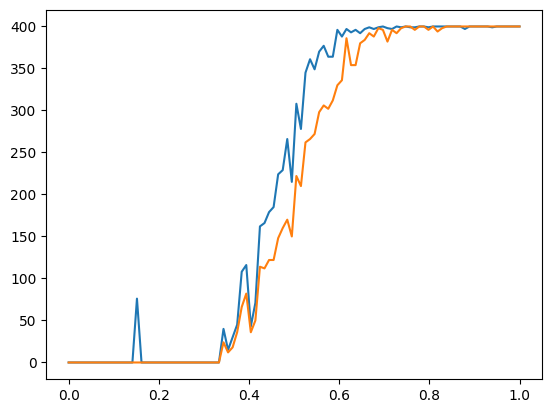

In [23]:
plt.plot(ratios, res[:, 1:])

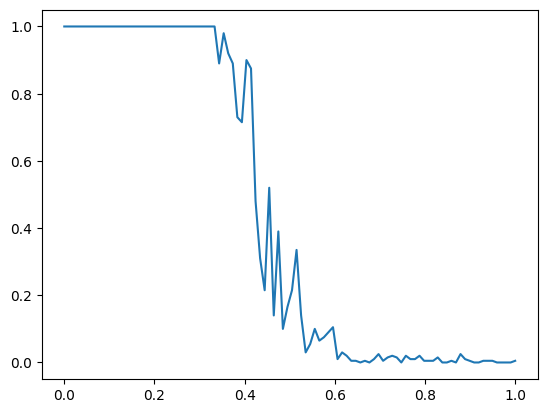

In [26]:
plt.plot(ratios, res[:, 0])

In [28]:
np.column_stack([ratios, res])

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01010101e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.02020202e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.03030303e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.04040404e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.05050505e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.06060606e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.07070707e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.08080808e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.09090909e-02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01010101e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.11111111e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.21212121e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31313131e-01, 1.00000000e+00, 0.00000000e

In [29]:
np.savetxt('Magnetizations_walls.dat', np.column_stack([ratios, res]))